In [ ]:
#PRICE

In [108]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import plotly.express as px
import seaborn as sns  
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

In [109]:
df = pd.read_csv('C:/Users\hemar\Downloads\AB_NYC_2019.csv (1)\AB_NYC_2019.csv')

In [110]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [112]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [113]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [114]:


df['last_review'] = pd.to_datetime(df['last_review'])

df1 = df.loc[~df['last_review'].isna()]
recent_date = df1['last_review'].max()

#Make a column days since last review. Its value is the recent date - value of last_review date
df['days_since_last_review'] = (recent_date - df['last_review']).dt.days

In [115]:
px.histogram(df,x='days_since_last_review')

In [116]:
def days_last_review_processing(value):
    if value <= 20:
        value = '0-20 days'
    elif value <= 60:
        value = '21-60 days'
    elif value <= 180:
        value = '61-180 days'
    elif value <= 540:
        value = '181-540 days'
    elif value >540:
        value = '540+ days'
    return value

In [117]:
df['days_since_last_review'] = df['days_since_last_review'].apply(days_last_review_processing)
df['days_since_last_review'] = df['days_since_last_review'].fillna('unknown')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [118]:
df = df.drop(['id','host_id','host_name','last_review'],axis=1)
df

name neighbourhood_group  \
0                     Clean & quiet apt home by the park            Brooklyn   
1                                  Skylit Midtown Castle           Manhattan   
2                    THE VILLAGE OF HARLEM....NEW YORK !           Manhattan   
3                        Cozy Entire Floor of Brownstone            Brooklyn   
4       Entire Apt: Spacious Studio/Loft by central park           Manhattan   
...                                                  ...                 ...   
48890    Charming one bedroom - newly renovated rowhouse            Brooklyn   
48891      Affordable room in Bushwick/East Williamsburg            Brooklyn   
48892            Sunny Studio at Historical Neighborhood           Manhattan   
48893               43rd St. Time Square-cozy single bed           Manhattan   
48894  Trendy duplex in the very heart of Hell's Kitchen           Manhattan   

            neighbourhood  latitude  longitude        room_type  price  \
0              Kensington  40.64749  -73.97237     Private room    149   
1                 Midtown  40.75362  -73.98377  Entire home/apt    225   
2                  Harlem  40.80902  -73.94190     Private room    150   
3            Clinton Hill  40.68514  -73.95976  Entire home/apt     89   
4             East Harlem  40.79851  -73.94399  Entire home/apt     80   
...                   ...       ...        ...              ...    ...   
48890  Bedford-Stuyvesant  40.67853  -73.94995     Private room     70   
48891            Bushwick  40.70184  -73.93317     Private room     40   
48892              Harlem  40.81475  -73.94867  Entire home/apt    115   
48893      Hell's Kitchen  40.75751  -73.99112      Shared room     55   
48894      Hell's Kitchen  40.76404  -73.98933     Private room     90   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                   1                  9               0.21   
1                   1                 45               0.38   
2                   3                  0               0.00   
3                   1                270               4.64   
4                  10                  9               0.10   
...               ...                ...                ...   
48890               2                  0               0.00   
48891               4                  0               0.00   
48892              10                  0               0.00   
48893               1                  0               0.00   
48894               7                  0               0.00   

       calculated_host_listings_count  availability_365 days_since_last_review  
0                                   6               365           181-540 days  
1                                   2               355             21-60 days  
2                                   1               365                unknown  
3                                   1               194              0-20 days  
4                                   1                 0           181-540 days  
...                               ...               ...                    ...  
48890                               2                 9                unknown  
48891                               2                36                unknown  
48892                               1                27                unknown  
48893                               6                 2                unknown  
48894                               1                23                unknown  

[48895 rows x 13 columns]

In [119]:
px.histogram(df['price'],nbins=500,marginal='box')

In [120]:
px.histogram(np.log1p(df['price']),nbins=500,marginal='box')

In [121]:
#Remove Outliers based on IQR of Log(price)
df['log1price'] = np.log1p(df['price'])
df = df.loc[(df['log1price']<6) & (df['log1price'] > 3)]
df = df.drop('log1price',axis=1)

In [122]:
px.histogram(df['minimum_nights'],marginal='box')

In [123]:
#I will use IQR to exclude outliers of minimum_night column
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3-Q1
lowBound = Q1 - 1.5*IQR
upBound = Q3 + 1.5*IQR

df = df.loc[(df['minimum_nights'] > lowBound) & (df['minimum_nights'] < upBound)]

In [124]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  40708.000000  40708.000000  40708.000000    40708.000000   
mean      40.727818    -73.949721    125.620369        2.696743   
std        0.055956      0.047499     77.432120        1.845983   
min       40.499790    -74.244420     20.000000        1.000000   
25%       40.688430    -73.981583     68.000000        1.000000   
50%       40.720745    -73.953780    100.000000        2.000000   
75%       40.763250    -73.932997    163.000000        3.000000   
max       40.913060    -73.712990    402.000000       10.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       40708.000000       40708.000000                    40708.000000   
mean           26.108038           1.226556                        3.140537   
std            47.162453           1.677597                       20.289926   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.060000                        1.000000   
50%             7.000000           0.500000                        1.000000   
75%            28.000000           1.880000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      40708.000000  
mean          98.035693  
std          124.759105  
min            0.000000  
25%            0.000000  
50%           26.000000  
75%          179.000000  
max          365.000000

In [125]:
df.sample(5)

name neighbourhood_group  \
7391                              Private Room in Harlem           Manhattan   
15494                                     Violet Terrace            Brooklyn   
42981             Hudson river and Central Park big room           Manhattan   
22730  Private Room 15 Min to Manhattan (Lower East S...            Brooklyn   
20175           1 Bedroom Apartment on tree-lined street           Manhattan   

            neighbourhood  latitude  longitude        room_type  price  \
7391               Harlem  40.82205  -73.94523     Private room     60   
15494  Bedford-Stuyvesant  40.68607  -73.91761     Private room     60   
42981     Upper West Side  40.77859  -73.98481     Private room    228   
22730  Bedford-Stuyvesant  40.69944  -73.94527     Private room     46   
20175              Harlem  40.80695  -73.94982  Entire home/apt    130   

       minimum_nights  number_of_reviews  reviews_per_month  \
7391                1                  0               0.00   
15494               2                 53               1.37   
42981               1                  3               0.96   
22730               2                 71               2.69   
20175               2                133               4.21   

       calculated_host_listings_count  availability_365 days_since_last_review  
7391                                1                 0                unknown  
15494                               2               365              0-20 days  
42981                               3               341             21-60 days  
22730                               2               309              0-20 days  
20175                               2                21              0-20 days

<Axes: xlabel='neighbourhood_group', ylabel='count'>

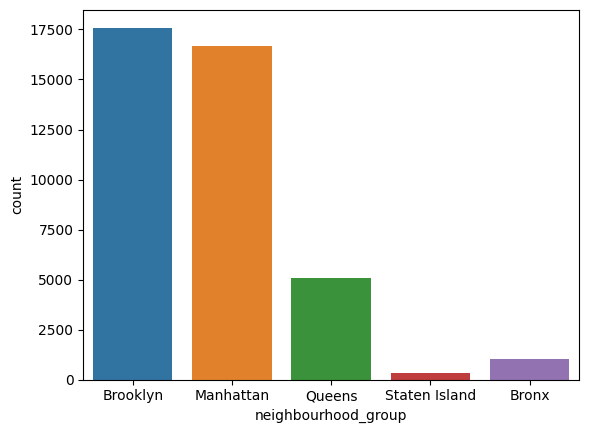

In [126]:
sns.countplot(data = df, x='neighbourhood_group')

<Axes: >

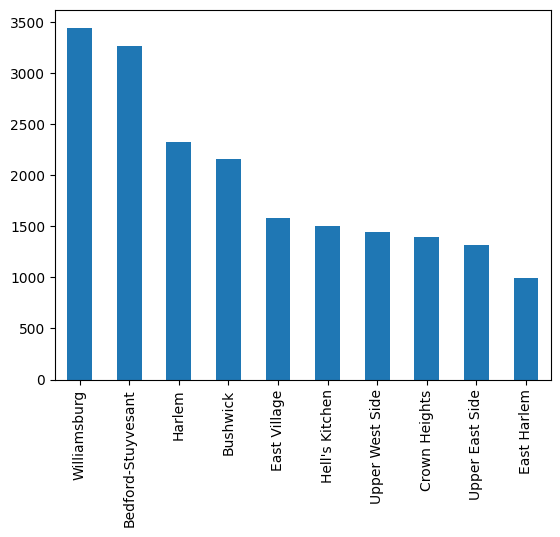

In [127]:
df['neighbourhood'].value_counts().nlargest(10).plot(kind='bar')

<Axes: xlabel='neighbourhood', ylabel='count'>

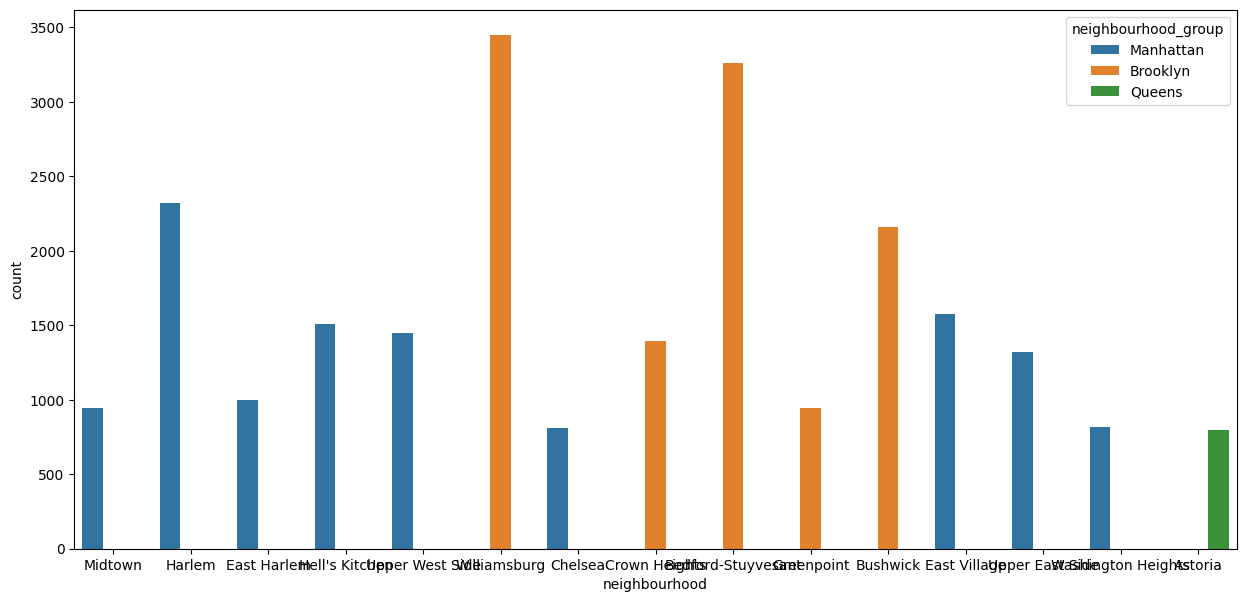

In [128]:
top_values = df['neighbourhood'].value_counts().nlargest(15)
df_top = df.loc[df['neighbourhood'].isin(top_values.index)]

plt.figure(figsize=(15,7))
sns.countplot(data = df_top, x='neighbourhood',hue='neighbourhood_group')

<Axes: xlabel='latitude', ylabel='longitude'>

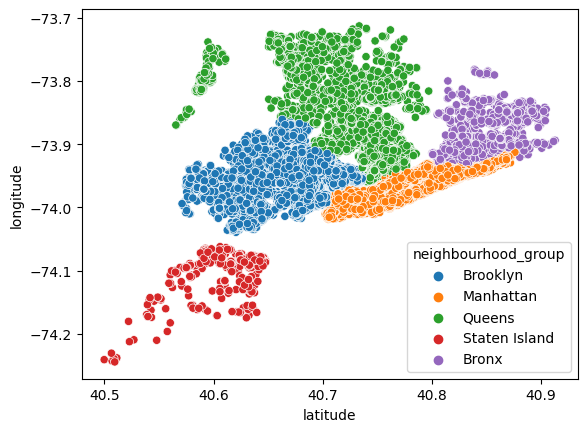

In [129]:
sns.scatterplot(data =df,x='latitude',y='longitude',hue='neighbourhood_group')

<Axes: xlabel='room_type', ylabel='count'>

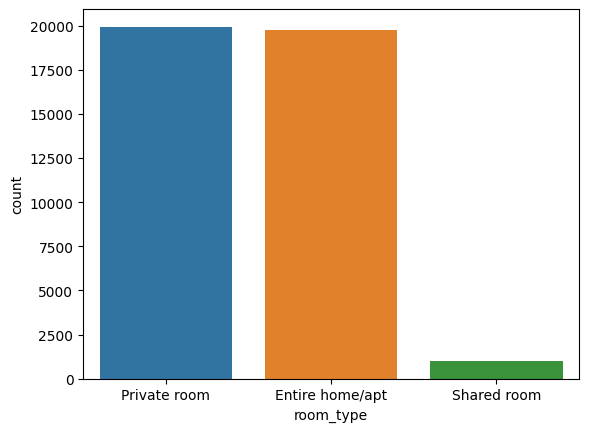

In [130]:
sns.countplot(data=df,x='room_type')

C:\Users\hemar\AppData\Local\Temp\ipykernel_21780\4074697800.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

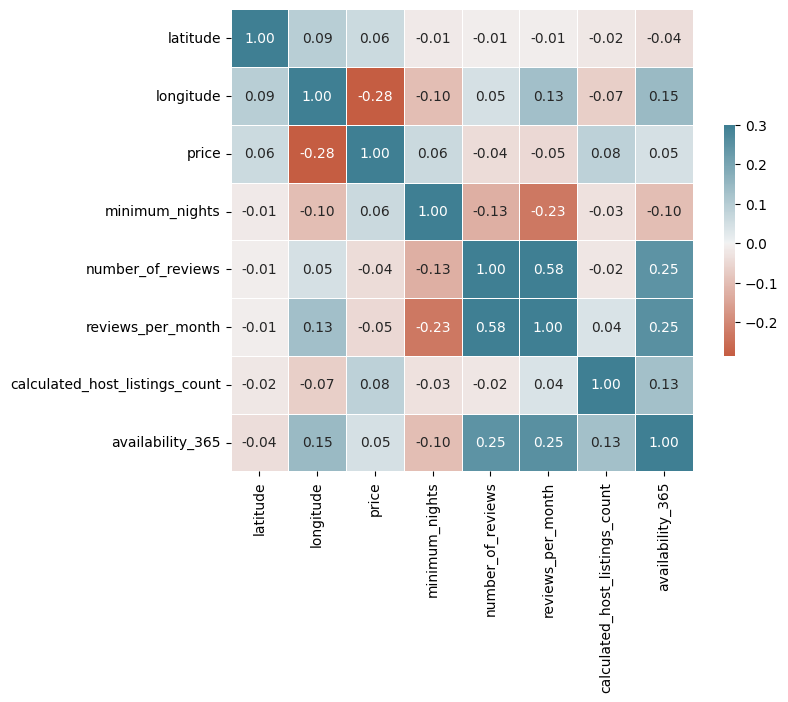

In [131]:
plt.figure(figsize=(8,6))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [132]:
df_model= df.drop(['name'],axis=1)

In [133]:
df_small = df_model.sample(8000,random_state=10)

In [134]:
df_small = pd.get_dummies(df_small)
df_model = pd.get_dummies(df_model)

In [135]:
X_small = df_small.drop('price',axis=1)
y_small = df_small['price']

X = df_model.drop('price',axis=1)
y = df_model['price']

In [136]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small,y_small, random_state=10, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=10, test_size=0.2)

mms = MinMaxScaler()
X_train_scaled_small = mms.fit_transform(X_train_small)
X_test_scaled_small = mms.transform(X_test_small)

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [137]:
rdf = RandomForestRegressor()
rdf.fit(X_train_scaled_small, y_train_small)

y_train_pred = rdf.predict(X_train_scaled_small)
y_test_pred = rdf.predict(X_test_scaled_small)

In [138]:
r2_train = r2_score(y_train_small, y_train_pred)
r2_test = r2_score(y_test_small, y_test_pred)

RMSE_train = np.sqrt(mean_squared_error(y_train_small, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test_small, y_test_pred))



print("RMSE for Train: ", RMSE_train)
print("R2 Score Train: ", r2_train)

print("RMSE for Test: ", RMSE_test)
print("R2 Score Test: ", r2_test)

RMSE for Train:  20.35595596809445
R2 Score Train:  0.9299276731693245
RMSE for Test:  55.61843929568233
R2 Score Test:  0.5122342450399486


In [139]:
params = {'n_estimators': [500,700],
          'max_depth': [7,9],
          'min_samples_split': [2, 4],
        'min_samples_leaf': [2, 4]
        }     

rdf = RandomForestRegressor()
gridsearch = GridSearchCV(rdf, params, cv=3, verbose=1)
gridsearch.fit(X_train_scaled_small, y_train_small)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 9], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [500, 700]},
             verbose=1)

In [140]:
print(gridsearch.best_score_)
best_params = gridsearch.best_params_
best_params

0.5130732276362431


{'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

In [141]:
#Fit best params to whole dataset
rdf = RandomForestRegressor(**best_params)
rdf.fit(X_train_scaled, y_train)

y_train_pred = rdf.predict(X_train_scaled)
y_test_pred = rdf.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE for Train: ", RMSE_train)
print("R2 Score Train: ", r2_train)

print("RMSE for Test: ", RMSE_test)
print("R2 Score Test: ", r2_test)

RMSE for Train:  49.23818671201351
R2 Score Train:  0.5955058044715371
RMSE for Test:  52.769933658890174
R2 Score Test:  0.5361251631503927


In [142]:
import xgboost as xgb
xgb = xgb.XGBRegressor(objective='reg:squarederror',verbosity=1)

xgb.fit(X_train_scaled,y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

In [143]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("RMSE for Train: ", RMSE_train)
print("R2 Score Train: ", r2_train)

print("RMSE for Test: ", RMSE_test)
print("R2 Score Test: ", r2_test)

RMSE for Train:  45.24812963060176
R2 Score Train:  0.6584066116729832
RMSE for Test:  52.79914446028873
R2 Score Test:  0.5356114650978023


In [144]:
import xgboost as xgb
param_grid = {
    'learning_rate': [0.05,0.1],
    'max_depth': [3,5,7],
    'subsample':[0.7,1],
    'gamma': [0.01,0.1],
    'alpha': [0.05,0.1,0.3]
}

xgb = xgb.XGBRegressor()
gridsearch = GridSearchCV(xgb, param_grid, cv=3, verbose=1)

gridsearch.fit(X_train_scaled_small, y_train_small)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'alpha': [0.05, 0.1, 0.3], 'gamma': [0.01, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'subsample': [0.7, 1]},
             verbose=1)

In [145]:
best_params_xgb = gridsearch.best_params_
best_params_xgb

{'alpha': 0.1,
 'gamma': 0.01,
 'learning_rate': 0.05,
 'max_depth': 5,
 'subsample': 0.7}

In [ ]:
#AVAILABILITY

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.utils import class_weight
import tensorflow as tf


In [149]:
data = pd.read_csv('C:/Users\hemar\Downloads\AB_NYC_2019.csv (1)\AB_NYC_2019.csv')

In [150]:
data


id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [152]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

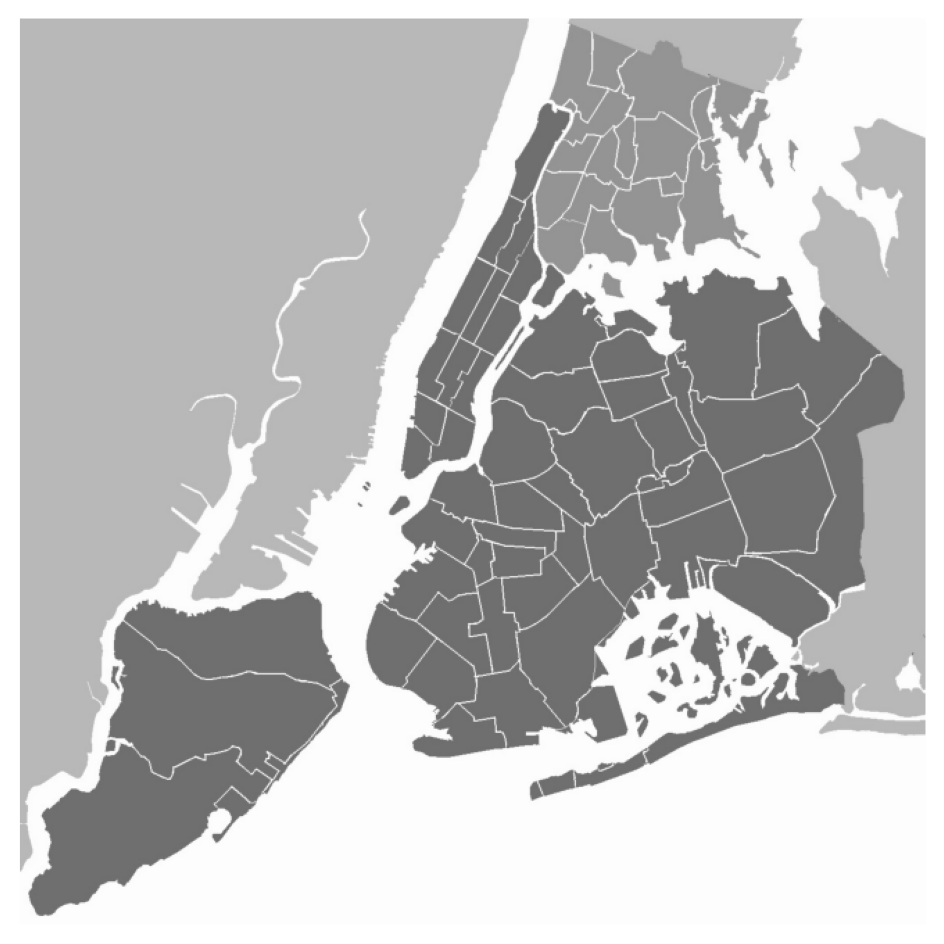

In [153]:
img= Image.open('C:/Users\hemar\Downloads\img.png')

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(img, extent=(0,1,0,1))
plt.show()

In [154]:
coords = data.loc[:, ['longitude', 'latitude']].copy()
coords

longitude  latitude
0      -73.97237  40.64749
1      -73.98377  40.75362
2      -73.94190  40.80902
3      -73.95976  40.68514
4      -73.94399  40.79851
...          ...       ...
48890  -73.94995  40.67853
48891  -73.93317  40.70184
48892  -73.94867  40.81475
48893  -73.99112  40.75751
48894  -73.98933  40.76404

[48895 rows x 2 columns]

In [155]:
min_max_scaler = MinMaxScaler()

coords = pd.DataFrame(min_max_scaler.fit_transform(coords), columns = coords.columns)
coords

longitude  latitude
0       0.511921  0.357393
1       0.490469  0.614199
2       0.569257  0.748252
3       0.535649  0.448496
4       0.565324  0.722820
...          ...       ...
48890   0.554109  0.432502
48891   0.585684  0.488906
48892   0.556517  0.762117
48893   0.476639  0.623612
48894   0.480007  0.639412

[48895 rows x 2 columns]

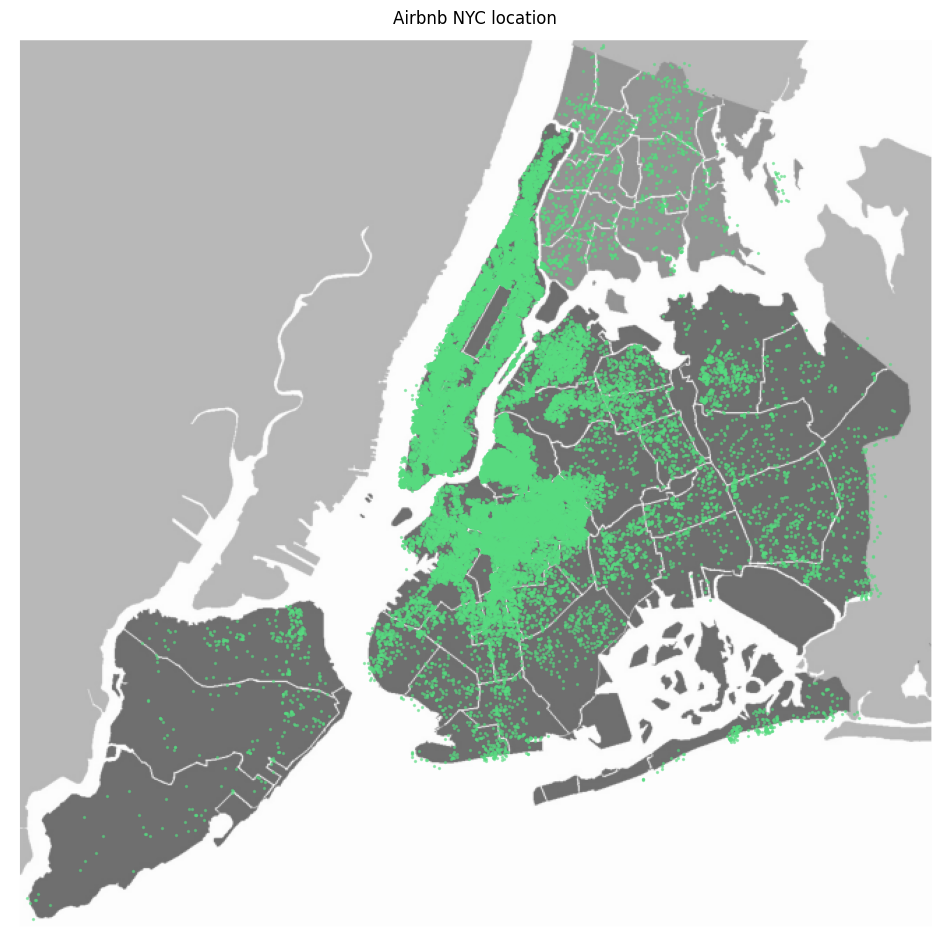

In [156]:

plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img, extent=(-0.02, 1.045, -0.02, 1.015))
plt.scatter(x = coords['longitude'], y=coords['latitude'], s=2, c='#57db80', alpha= 0.5)
plt.title('Airbnb NYC location')
plt.show()


In [157]:
data['availability_365'] = data['availability_365'].apply(lambda x: 1 if x == 365 else 0)

In [158]:
data['availability_365'].value_counts() / len(data['availability_365'])

0    0.973515
1    0.026485
Name: availability_365, dtype: float64

In [159]:
{feature: list(data[feature].unique()) for feature in data.columns if data.dtypes[feature] == 'object'}

{'name': ['Clean & quiet apt home by the park',
  'Skylit Midtown Castle',
  'THE VILLAGE OF HARLEM....NEW YORK !',
  'Cozy Entire Floor of Brownstone',
  'Entire Apt: Spacious Studio/Loft by central park',
  'Large Cozy 1 BR Apartment In Midtown East',
  'BlissArtsSpace!',
  "Large Furnished Room Near B'way ",
  'Cozy Clean Guest Room - Family Apt',
  'Cute & Cozy Lower East Side 1 bdrm',
  'Beautiful 1br on Upper West Side',
  'Central Manhattan/near Broadway',
  'Lovely Room 1, Garden, Best Area, Legal rental',
  'Wonderful Guest Bedroom in Manhattan for SINGLES',
  'West Village Nest - Superhost',
  'Only 2 stops to Manhattan studio',
  'Perfect for Your Parents + Garden',
  'Chelsea Perfect',
  'Hip Historic Brownstone Apartment with Backyard',
  'Huge 2 BR Upper East  Cental Park',
  'Sweet and Spacious Brooklyn Loft',
  'CBG CtyBGd HelpsHaiti rm#1:1-4',
  'CBG Helps Haiti Room#2.5',
  'CBG Helps Haiti Rm #2',
  'MAISON DES SIRENES1,bohemian apartment',
  'Sunny Bedroom Across Pr

In [160]:
def onehot_encode(df, column, prefixes):
    df = df.copy()
    for column, prefix in zip(column, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
        
    return df

In [161]:
data = onehot_encode(data, column=['neighbourhood_group', 'neighbourhood', 'room_type'], prefixes = ['G', 'N', 'R'])

In [162]:
y = data['availability_365'].copy()
X = data.drop('availability_365', axis=1)

In [163]:
X

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name  latitude  longitude  price  minimum_nights  \
0               John  40.64749  -73.97237    149               1   
1           Jennifer  40.75362  -73.98377    225               1   
2          Elisabeth  40.80902  -73.94190    150               3   
3        LisaRoxanne  40.68514  -73.95976     89               1   
4              Laura  40.79851  -73.94399     80              10   
...              ...       ...        ...    ...             ...   
48890        Sabrina  40.67853  -73.94995     70               2   
48891        Marisol  40.70184  -73.93317     40               4   
48892  Ilgar & Aysel  40.81475  -73.94867    115              10   
48893            Taz  40.75751  -73.99112     55               1   
48894     Christophe  40.76404  -73.98933     90               7   

       number_of_reviews last_review  ...  N_Williamsburg  N_Willowbrook  \
0                      9  2018-10-19  ...               0              0   
1                     45  2019-05-21  ...               0              0   
2                      0         NaN  ...               0              0   
3                    270  2019-07-05  ...               0              0   
4                      9  2018-11-19  ...               0              0   
...                  ...         ...  ...             ...            ...   
48890                  0         NaN  ...               0              0   
48891                  0         NaN  ...               0              0   
48892                  0         NaN  ...               0              0   
48893                  0         NaN  ...               0              0   
48894                  0         NaN  ...               0              0   

       N_Windsor Terrace  N_Woodhaven  N_Woodlawn  N_Woodrow  N_Woodside  \
0                      0            0           0          0           0   
1                      0            0           0          0           0   
2                      0            0           0          0           0   
3                      0            0           0          0           0   
4                      0            0           0          0           0   
...                  ...          ...         ...        ...         ...   
48890                  0            0           0          0           0   
48891                  0            0           0          0           0   
48892                  0            0           0          0           0   
48893                  0            0           0          0           0   
48894                  0            0           0          0           0   

       R_Entire home/apt  R_Private room  R_Shared room  
0                      0               1              0  
1                      1               0              0  
2                      0               1              0  
3                      1               0              0  
4                      1               0              0  
...                  ...             ...            ...  
488

In [164]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.7, random_state = 200)

In [165]:
X.shape

(48895, 241)

In [166]:
inputs = tf.keras.Input(shape = (X.shape[1],), name = 'input_layer')

hidden_1 = tf.keras.layers.Dense(64, activation = 'relu', name='hidden_1')(inputs)
hidden_2=  tf.keras.layers.Dense(64, activation = 'relu', name='hidden_2')(hidden_1)

outputs= tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(hidden_2)

model = tf.keras.Model(inputs, outputs)

In [182]:
model.summary()
tf.keras.utils.plot_model(model)
class_weight
batch_size = 32
epochs =29

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
    
)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 241)]             0         
                                                                 
 hidden_1 (Dense)            (None, 64)                15488     
                                                                 
 hidden_2 (Dense)            (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [186]:
results = model.evaluate(X_test, y_test, verbose=0)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [187]:
print("Accuracy:", results[1])
print(" ROC AUC:", results[2])


Accuracy: 0.18058490753173828
 ROC AUC: 0.5328026413917542
